<a href="https://colab.research.google.com/github/MajumdarAritra/Income_predictor/blob/main/income_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive/")
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("DataSet for Decision Tree.csv")
df = df.drop(['capital_gain', 'capital_loss'], axis='columns')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Eec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [ ]:
df1=df.copy()


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  hours_per_week  32561 non-null  int64 
 11  native_country  31978 non-null  object
 12  income          32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
df1.describe()

,age,fnlwgt,education_num,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456
std,13.640433,1.055500e+05,2.572720,12.347429
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


In [ ]:
 df1['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv("DataSet for Decision Tree.csv")

columns_to_encode = ['workclass', 'education', 'marital_status', 'relationship', 'race', 'sex', 'occupation', 'native_country']
le = LabelEncoder()

for column in columns_to_encode:
    df1[column + '_n'] = le.fit_transform(df1[column])

df1 = df1.drop(columns_to_encode, axis='columns')





In [ ]:
 df1['sex_n'].value_counts()

1    21790
0    10771
Name: sex_n, dtype: int64

In [ ]:
df1 = df1.drop(['capital_gain', 'capital_loss'], axis='columns')
df1

,age,fnlwgt,education_num,hours_per_week,income,workclass_n,education_n,marital_status_n,relationship_n,race_n,sex_n,occupation_n,native_country_n
0,90,77053,9,40,<=50K,8,11,6,1,4,0,14,38
1,82,132870,9,18,<=50K,3,11,6,1,4,0,3,38
2,66,186061,10,40,<=50K,8,15,6,4,2,0,14,38
3,54,140359,4,40,<=50K,3,5,0,4,4,0,6,38
4,41,264663,10,40,<=50K,3,15,5,3,4,0,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,40,<=50K,3,15,4,1,4,1,10,38
32557,27,257302,12,38,<=50K,3,7,2,5,4,0,12,38
32558,40,154374,9,40,>50K,3,11,2,0,4,1,6,38
32559,58,151910,9,40,<=50K,3,11,6,4,4,0,0,38


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>],
       [<Axes: title={'center': 'hours_per_week'}>,
        <Axes: title={'center': 'workclass_n'}>,
        <Axes: title={'center': 'education_n'}>],
       [<Axes: title={'center': 'marital_status_n'}>,
        <Axes: title={'center': 'relationship_n'}>,
        <Axes: title={'center': 'race_n'}>],
       [<Axes: title={'center': 'sex_n'}>,
        <Axes: title={'center': 'occupation_n'}>,
        <Axes: title={'center': 'native_country_n'}>]], dtype=object)

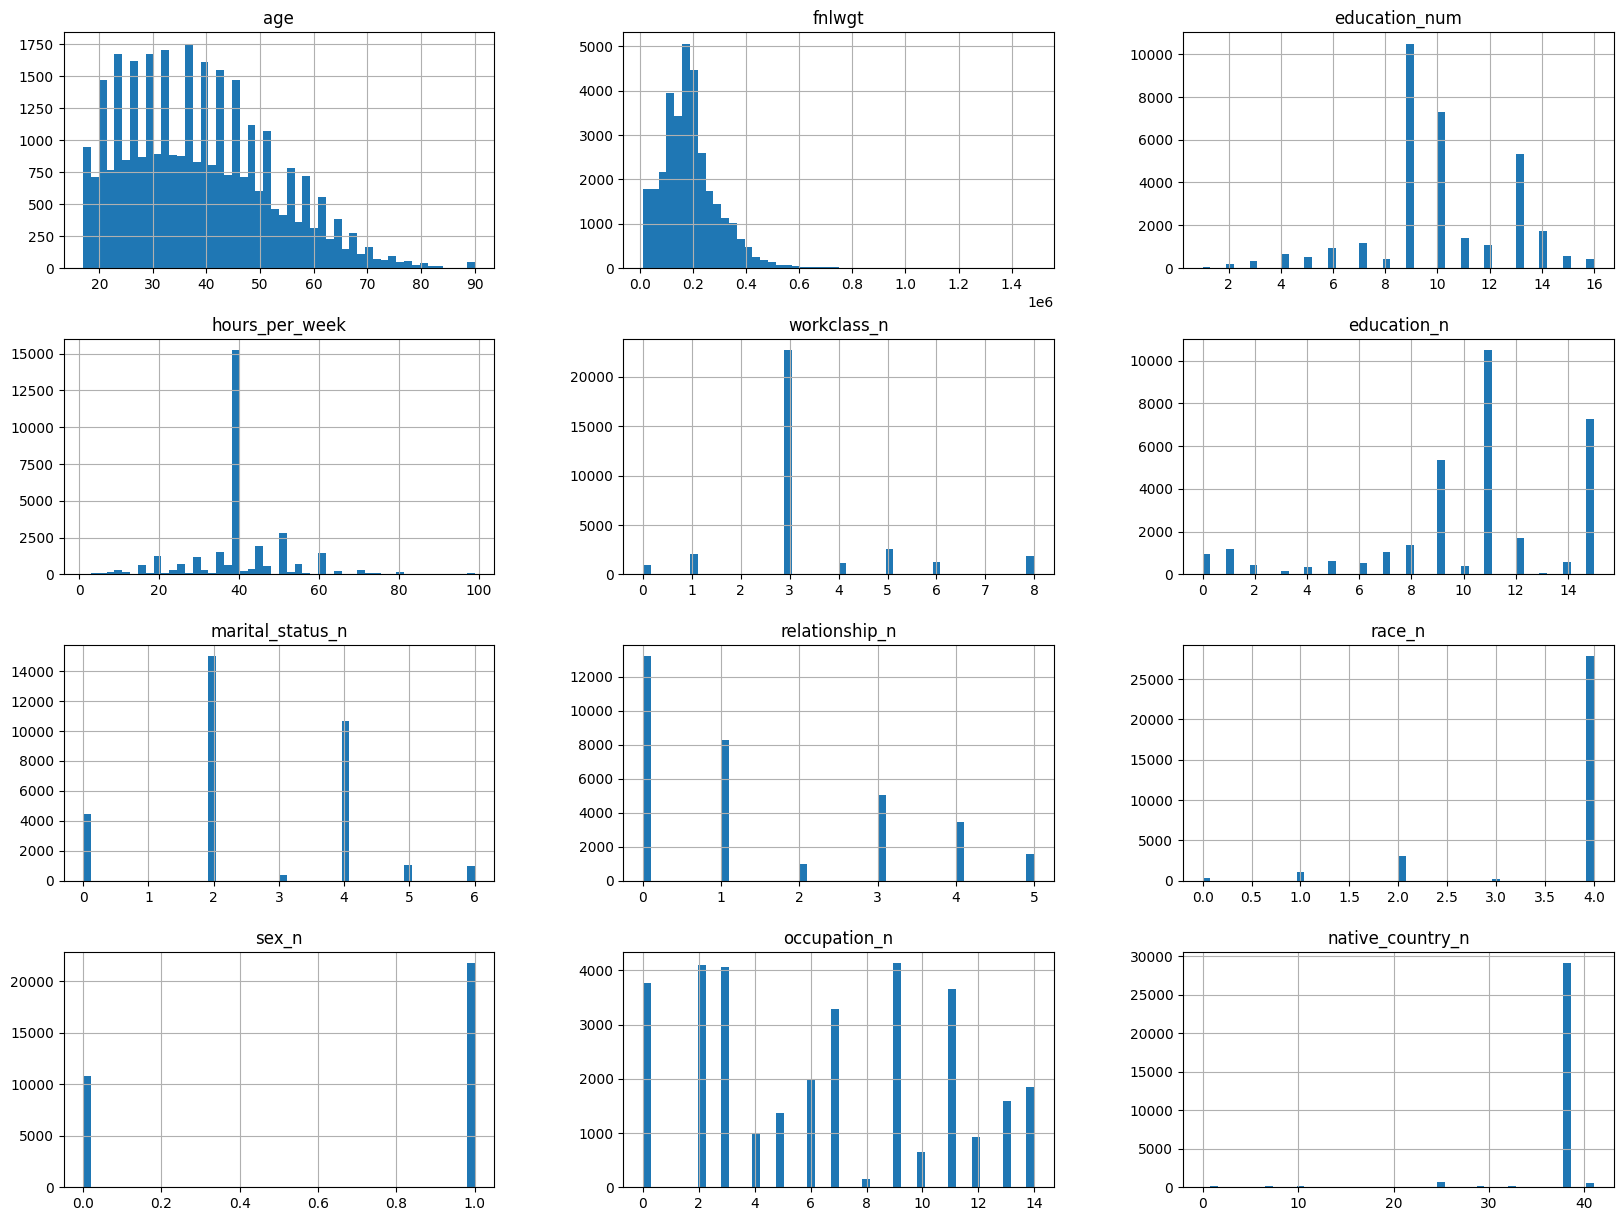

In [ ]:
df1.hist(bins=50,figsize=(20,15))

In [ ]:
 df1['sex_n'].value_counts()

1    21790
0    10771
Name: sex_n, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df1,test_size = 0.2,random_state=42)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df1,df1['sex_n']):
  strat_train_set=df1.loc[train_index]
  strat_test_set=df1.loc[test_index]



In [ ]:
 strat_train_set['sex_n'].value_counts()

1    17431
0     8617
Name: sex_n, dtype: int64

In [ ]:
df = strat_train_set.copy()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fnlwgt', ylabel='age'>,
        <Axes: xlabel='workclass_n', ylabel='age'>,
        <Axes: xlabel='education_num', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fnlwgt'>,
        <Axes: xlabel='fnlwgt', ylabel='fnlwgt'>,
        <Axes: xlabel='workclass_n', ylabel='fnlwgt'>,
        <Axes: xlabel='education_num', ylabel='fnlwgt'>],
       [<Axes: xlabel='age', ylabel='workclass_n'>,
        <Axes: xlabel='fnlwgt', ylabel='workclass_n'>,
        <Axes: xlabel='workclass_n', ylabel='workclass_n'>,
        <Axes: xlabel='education_num', ylabel='workclass_n'>],
       [<Axes: xlabel='age', ylabel='education_num'>,
        <Axes: xlabel='fnlwgt', ylabel='education_num'>,
        <Axes: xlabel='workclass_n', ylabel='education_num'>,
        <Axes: xlabel='education_num', ylabel='education_num'>]],
      dtype=object)

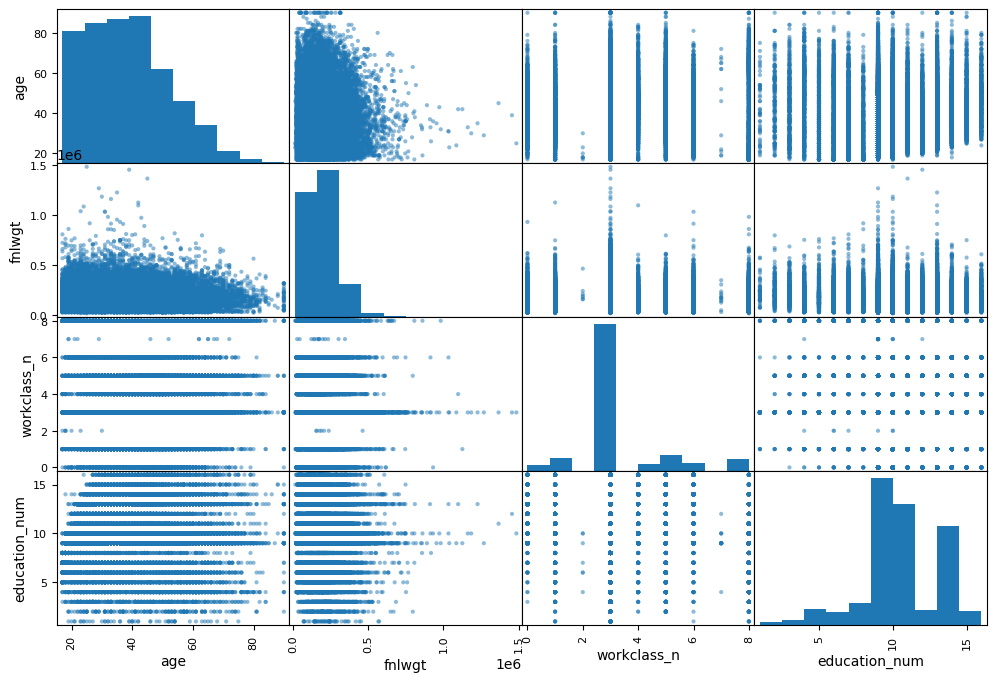

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["age","fnlwgt","workclass_n","education_num"]
scatter_matrix(df1[attributes],figsize = (12,8))

<Axes: xlabel='age', ylabel='education_num'>

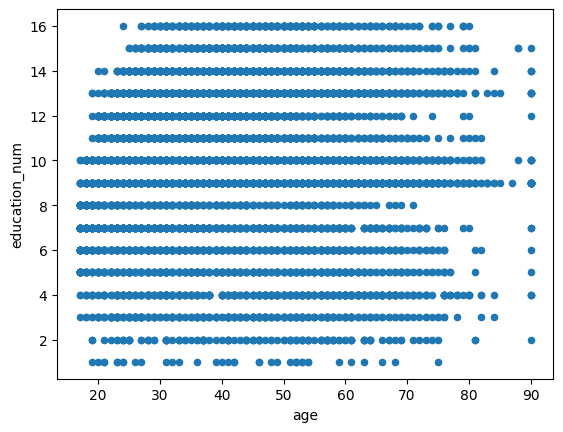

In [ ]:
df.plot(kind="scatter",x="age",y ="education_num" )

In [ ]:
df = train_set.drop("income",axis=1)
df_label= train_set["income"].copy()
df.head()

,age,fnlwgt,education_num,hours_per_week,workclass_n,education_n,marital_status_n,relationship_n,race_n,sex_n,occupation_n,native_country_n
5514,26,256263,9,25,3,11,4,1,4,1,2,38
19777,24,170277,9,35,3,11,4,1,4,0,7,38
10781,36,75826,13,40,3,9,0,4,4,0,0,38
32240,22,24395,10,20,6,15,2,5,4,0,0,38
9876,31,356689,13,40,1,9,2,0,4,1,9,38


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
    ('scaler', MinMaxScaler())
])




In [ ]:
df.head()

,age,fnlwgt,education_num,hours_per_week,workclass_n,education_n,marital_status_n,relationship_n,race_n,sex_n,occupation_n,native_country_n
5514,26,256263,9,25,3,11,4,1,4,1,2,38
19777,24,170277,9,35,3,11,4,1,4,0,7,38
10781,36,75826,13,40,3,9,0,4,4,0,0,38
32240,22,24395,10,20,6,15,2,5,4,0,0,38
9876,31,356689,13,40,1,9,2,0,4,1,9,38


In [ ]:

df = pd.DataFrame(df)

df_num_tr = my_pipeline.fit_transform(df)
df_num_tr


array([[0.12328767, 0.16905935, 0.53333333, ..., 1.        , 0.14285714,
        0.92682927],
       [0.09589041, 0.10947719, 0.53333333, ..., 0.        , 0.5       ,
        0.92682927],
       [0.26027397, 0.04402938, 0.8       , ..., 0.        , 0.        ,
        0.92682927],
       ...,
       [0.52054795, 0.15653744, 0.53333333, ..., 1.        , 0.85714286,
        0.92682927],
       [0.32876712, 0.09825105, 0.6       , ..., 1.        , 0.        ,
        0.92682927],
       [0.06849315, 0.104204  , 0.53333333, ..., 1.        , 0.35714286,
        0.75609756]])

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df_num_tr,df_label)


DecisionTreeClassifier()

In [ ]:
x_test = strat_test_set.drop('income',axis=1)
y_test = strat_test_set['income'].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final_predictions)

print(accuracy)

0.9562413634269922


In [ ]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, final_predictions)


print(cm)

[[4810  144]
 [ 141 1418]]
